<h2>Market Study - Food Industry Exports</h2>

<a href="https://openclassrooms.com/en/" >Openclassrooms</a>, Data Analyst Course
<br>Project 5 - Michael Orange

<hr>

A company in the food industry specialized in chicken is looking at expanding worldwide. All countries are considered. 
<br>The main objective is to provide the company with data ensuring it will collaborate with the most promising export market countries. 

Grouping countries in 'clusters' based on their similarity is required. 
<br>Default variables are: 
- country population, 
- population growth, 
- calory supply per capita and protein supply per capita, 
- prevalence of animal proteins in the mix. 

Additional relevant variable might be included (ex. GDP per capita)

<hr>

**Section 1** - [Import and Variable selections](#import)

**Section 2** - [Data overview](#overview)

**Section 3** - [Transoform data (Normalization)](#transform)

**Section 4** - [Hierarchical Clustering](#clustering)

**Section 5** - [PCA - Principal Component Analysis](#pca) 
- [Number of components](#comp)
- [Synthetic variables and Correlation Circles](#synth)
- [Individuals factor map](#map)

**Section 6** - [Analysis of the clusters](#analysis) 
- [Exportation to European Union](#eu)
- [Exportation to large market](#largemarkets)
- [Exportation to growing markets](#growthmarkets)

**Section 7** - [Testing Hypothesis](#analysis) 
- [Shapiro test](#shapiro)
- [Kolmogorov-Smirnov test](#kstest)

<hr>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

import scipy.stats as stats
import scipy.cluster.hierarchy as hierarchy

from sklearn import preprocessing
from sklearn import decomposition

from display_pca import *

<h2>Import Dataset and Selecting variables</h2>

In [2]:
#import 
data_country = pd.read_csv("data/output/data_country_simplified.csv")
data_country

,country,food_supply_kcalcapitaday,pop_growth,protein_supply_gcapitaday,protein_animal_over_protein,pop_thousand,euro_union
0,Armenia,2924.0,1.629045,3072.0,1.450521,2944.791,Outside EU
1,Afghanistan,2087.0,12.477767,1997.0,0.528793,36296.113,Outside EU
2,Albania,3188.0,-0.675703,3400.0,1.950588,2884.169,Outside EU
3,Algeria,3293.0,8.518733,3345.0,0.768311,41389.189,Outside EU
4,Angola,2474.0,14.610305,2266.0,0.726831,29816.766,Outside EU
...,...,...,...,...,...,...,...
167,Belgium,3737.0,2.382453,3770.0,1.535279,11419.748,EU
168,Luxembourg,3540.0,9.095768,3334.0,2.020996,591.910,EU
169,Serbia,2725.0,-1.000975,2799.0,1.429439,8829.628,Outside EU
170,Montenegro,3490.0,0.194462,3478.0,1.974411,627.563,Outside EU


In [3]:
#selection variables for the PCA
data_pca= data_country.copy().drop(['pop_thousand', 'euro_union'], axis = 1)
data_pca.set_index(['country'], inplace=True)

In [4]:
data_pca

,food_supply_kcalcapitaday,pop_growth,protein_supply_gcapitaday,protein_animal_over_protein
country,,,,
Armenia,2924.0,1.629045,3072.0,1.450521
Afghanistan,2087.0,12.477767,1997.0,0.528793
Albania,3188.0,-0.675703,3400.0,1.950588
Algeria,3293.0,8.518733,3345.0,0.768311
Angola,2474.0,14.610305,2266.0,0.726831
...,...,...,...,...
Belgium,3737.0,2.382453,3770.0,1.535279
Luxembourg,3540.0,9.095768,3334.0,2.020996
Serbia,2725.0,-1.000975,2799.0,1.429439


<h2>Overview of the data</h2>

In [5]:
data_pca.describe()

,food_supply_kcalcapitaday,pop_growth,protein_supply_gcapitaday,protein_animal_over_protein
count,172.000000,172.000000,172.000000,172.000000
mean,2847.610465,5.475461,2858.395349,1.239316
std,440.765024,5.016197,454.544301,0.576089
min,1879.000000,-5.434483,1754.000000,0.253906
25%,2523.250000,1.910891,2514.250000,0.746637
50%,2830.500000,4.755661,2871.500000,1.229501
75%,3196.500000,9.093107,3250.250000,1.667150
max,3770.000000,23.935417,3770.000000,3.015508


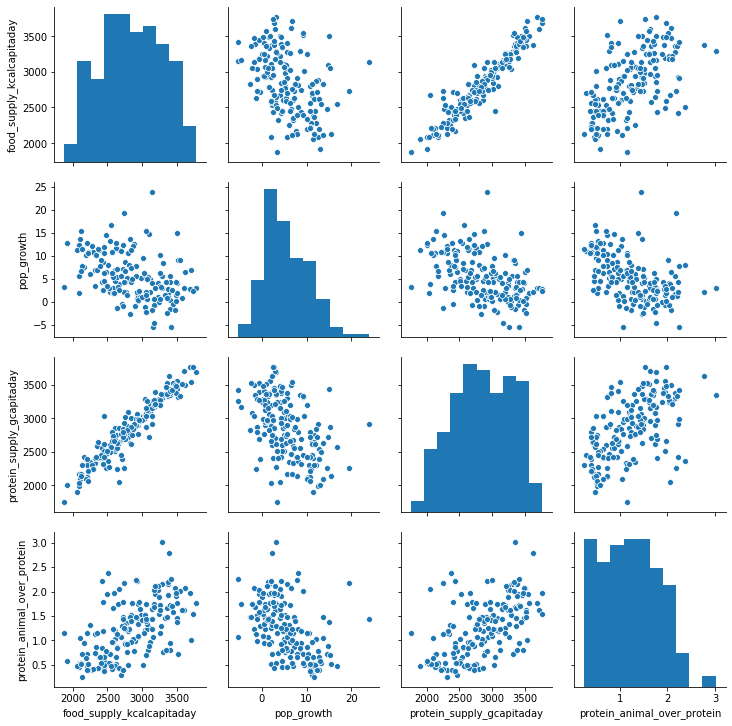

In [6]:
sns.pairplot(data_pca)

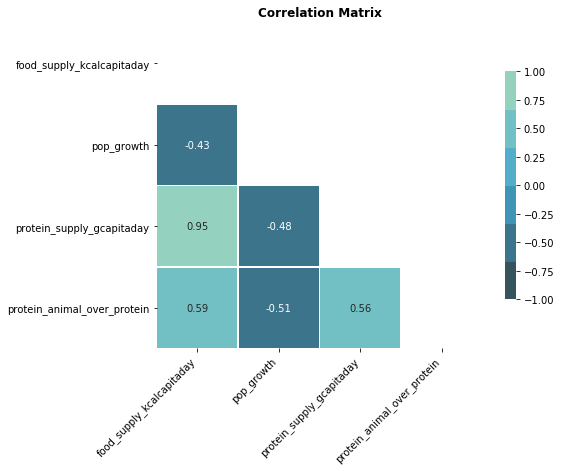

In [7]:
# Compute the correlation matrix
corr = data_pca.corr()
# Display correlation matrix
display_corr_matrix(corr)


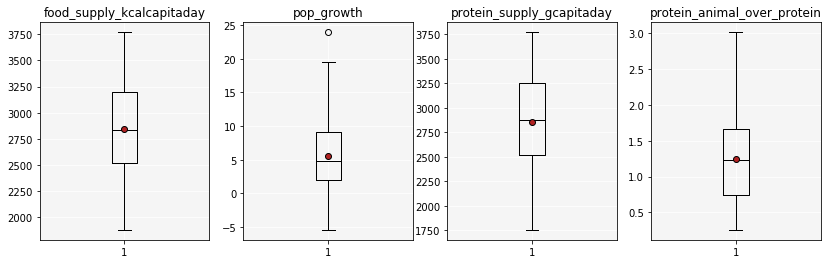

In [8]:
X = data_pca
display_multiple_boxplot(X, [(1,4)])

<h2>Transform data (Normalization)</h2>

In [9]:
X = data_pca.values
names = data_pca.index
features = data_pca.columns
print(X.shape)

(172, 4)


In [10]:
#number of observations
n = X.shape[0]
# number of variables
p = X.shape[1]

In [11]:
# Standardization and reduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

<h2>Clustering</h2>

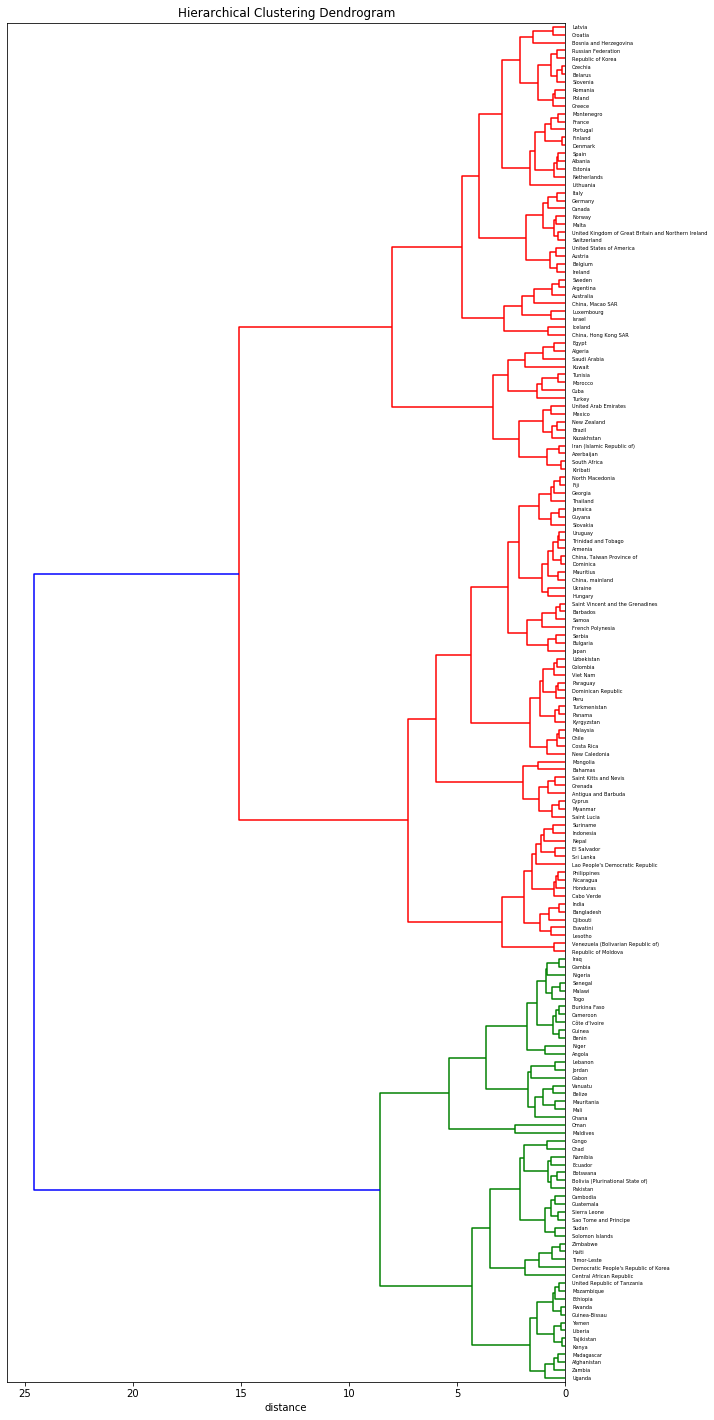

In [12]:
# Clustering hiérarchique
Z = hierarchy.linkage(X_scaled, 'ward')

#dendogram
plot_dendrogram(Z, names)

In [13]:
num_clusters = 5

In [14]:
clusters = hierarchy.fcluster(Z, num_clusters, criterion='maxclust')

In [15]:
df_cluster = pd.DataFrame(clusters)
df_cluster.columns = ['cluster']
df_cluster.index=names

In [16]:
df_cluster.reset_index().pivot_table(index='cluster', values='country', aggfunc=len)

,country
cluster,
1,31
2,23
3,61
4,17
5,40


<h2>Principal Component Analysis</h2>

In [17]:
# PCA
pca = decomposition.PCA(n_components=p)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<h3>Number of components</h3>

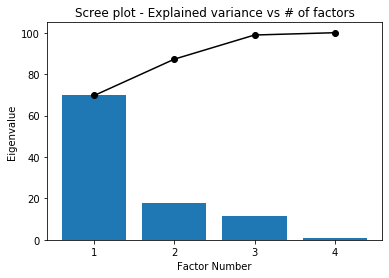

In [18]:
# Scree plot
display_scree_plot(pca)

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis).

In [19]:
n_comp = 2

In [20]:
# PCA with selected number of components
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

X_projected = pca.transform(X_scaled)

<h3>Synthetic variables</h3>

In [21]:
# data frame with new synthetic variables
df_X_projected = pd.DataFrame(X_projected, index=names, columns=['F'+str(i+1) for i in range(n_comp)])
df_X_projected = pd.concat([df_X_projected, df_cluster], axis=1)
df_X_projected.reset_index(inplace=True, col_level=-1)
first_col = df_X_projected.pop('country')
df_X_projected.insert(len(df_X_projected.columns), 'country', first_col)
df_X_projected

,F1,F2,cluster,country
0,-0.847213,-0.434938,3,Armenia
1,3.162137,-0.060438,1,Afghanistan
2,-2.177912,-0.494155,5,Albania
3,-0.509738,1.548117,4,Algeria
4,2.364843,0.777441,2,Angola
...,...,...,...,...
167,-2.719983,1.030801,5,Belgium
168,-1.786893,1.254936,5,Luxembourg
169,-0.466770,-1.255037,3,Serbia
170,-2.597994,-0.010405,5,Montenegro


In [22]:
# composition of the synthetic variables

F_composition = {}
for k in range(n_comp):
    F_composition['F{}'.format(k+1)] = {}
    for n in range(p):
        F_composition['F{}'.format(k+1)].update({data_pca.columns[n]: pca.components_[k][n]})
pd.DataFrame(F_composition)

,F1,F2
food_supply_kcalcapitaday,-0.549636,0.430243
pop_growth,0.414016,0.765409
protein_supply_gcapitaday,-0.551080,0.387037
protein_animal_over_protein,-0.472019,-0.281501


<h3>Correlation circles</h3>

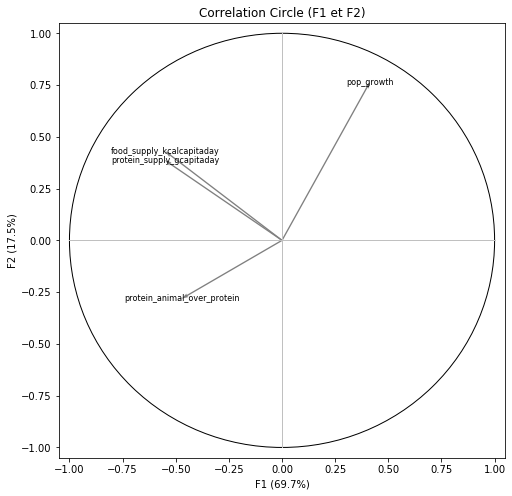

In [23]:
# Correlation Circle F1 and F2
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

F1: Level of development
<br>F2 : Population growth

In [24]:
# Correlation Circle F1 and F3
display_circles(pcs, n_comp, pca, [(0,2)], labels = np.array(features))

<h3>Individuals factor map</h3>

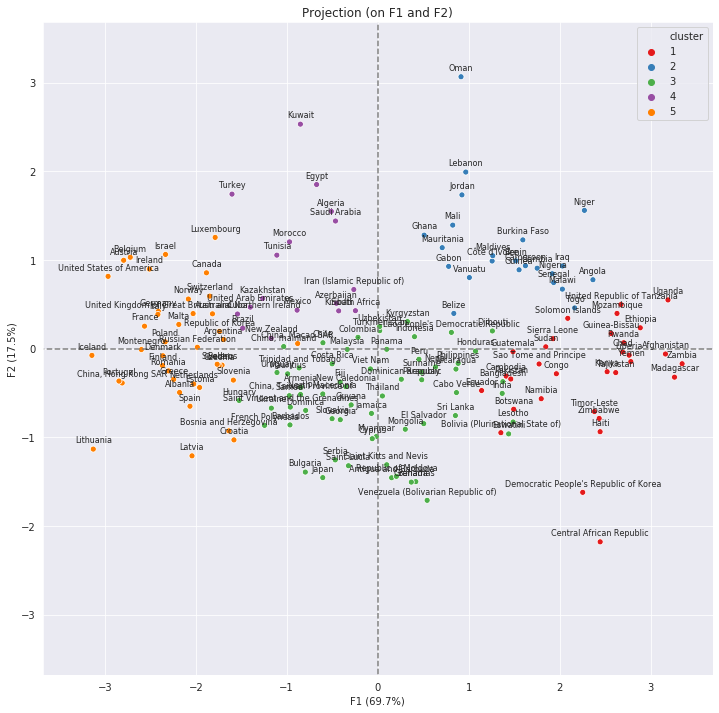

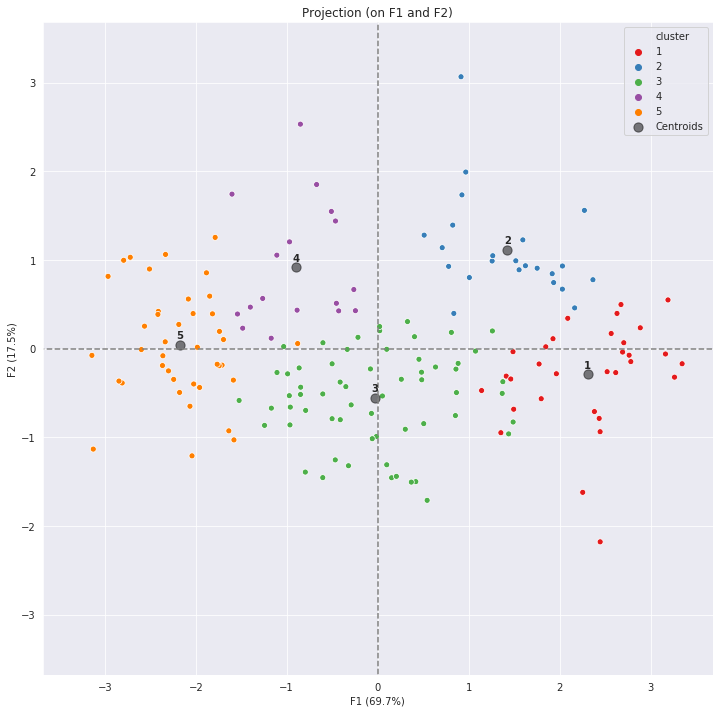

In [25]:
display_factorial_planes(X_projected, n_comp, pca,[(0,1)], labels=names, illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca,[(0,1)], illustrative_var=df_X_projected.cluster)

In [26]:
display_factorial_planes(X_projected, n_comp, pca,[(0,2)], labels=names, illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca,[(0,2)], illustrative_var=df_X_projected.cluster)

<hr>

<h2>Analysis of the clusters</h2>

In [27]:
data_country = pd.merge(data_country,df_X_projected[['country', 'cluster']])
data_country.pivot_table(index='cluster', values=data_country.columns[1:-1], aggfunc=np.mean)

,food_supply_kcalcapitaday,pop_growth,pop_thousand,protein_animal_over_protein,protein_supply_gcapitaday
cluster,,,,,
1,2216.000000,9.390774,26265.181742,0.708945,2236.612903
2,2727.478261,13.076056,21334.638870,0.747566,2660.956522
3,2751.360656,3.078836,66821.641672,1.299406,2778.721311
4,3276.058824,6.129493,48646.057647,1.141405,3269.411765
5,3370.875000,1.447640,29019.033825,1.883083,3400.625000


In [28]:
# data by clusters (group1, group2, etc.)
for n in range(num_clusters):
    group = 'group{}'.format(n+1)
    vars()[group] = data_country.loc[data_country['cluster']==n+1]   

<h3>Exportation to European Union</h3>

In [29]:
export_target_1 = group4.loc[(group4['euro_union'] =='EU') & (group4['country'] !='France') 
                             & (group4['pop_thousand'] > 10000) & (group4['pop_growth'] > 0)]

- Countries from the cluster 4 (priority)
- The production of the company is based in France, it would be easier for the company to export in the European Union (France is excluded).
- Exporting to a country with a significant market size is preferred. A minimum of 10 Millions of inhabitants is selected. 
- Countries with a positive growth of their population.

**Main target export countries** : {{export_target_1.country.tolist()}}

In [30]:
export_target_1

,country,food_supply_kcalcapitaday,pop_growth,protein_supply_gcapitaday,protein_animal_over_protein,pop_thousand,euro_union,cluster


<hr>
<h3>Exportation to large markets</h3>

In [31]:
export_target_2 = group4.loc[(group4['euro_union'] !='EU') & (group4['pop_thousand'] > 125000) & (group4['pop_growth'] > 2)]

- Countries from the cluster 4 (priority)
- Countries with signifant market size due to a population of 125+ Millions of inhabitants.
- Countries with a significant growth of their population (higher than 2%).

**Secondary target export countries** : {{export_target_2.country.tolist()}}

In [32]:
export_target_2

,country,food_supply_kcalcapitaday,pop_growth,protein_supply_gcapitaday,protein_animal_over_protein,pop_thousand,euro_union,cluster
14,Brazil,3262.0,3.381441,3250.0,1.624615,207833.823,Outside EU,4


<hr>
<h3>Exportation to markets with significant population growh</h3>

In [33]:
export_target_3 = group5.loc[(group5['pop_thousand'] > 50000) & (group5['pop_growth'] > 4) & (group5['protein_animal_over_protein'] > 40)]
export_target_3

,country,food_supply_kcalcapitaday,pop_growth,protein_supply_gcapitaday,protein_animal_over_protein,pop_thousand,euro_union,cluster


- Countries from cluster 3 in order to maintain a minimum of level of development. 
- Exporting to a country with a significant market size is preferred. A minimum of 50 millions of inhabitants is selected. 
- Countries with a strong growth of their population (higher than 4%).
- A minimum of protein animal in their protein mix of 40%.

**Opportunistic target export countries** : {{export_target_3.country.tolist()}}

<hr>

<h2>Testing Hypothesis</h2>

In order to evaluate if the variable follows a normal distribution (gaussian distribution), we measure the difference between the repartition function of a normal distribution and the variable. 
- H0: F = F0
- H1: F != F0

<h3>Shapiro test</h3>

In [34]:
for X in data_pca.columns: 
    print('{} (statistic, pvalue): {}'.format(X, stats.shapiro(data_country[X])))

food_supply_kcalcapitaday (statistic, pvalue): (0.9818369746208191, 0.024001505225896835)
pop_growth (statistic, pvalue): (0.9751194715499878, 0.003510316601023078)
protein_supply_gcapitaday (statistic, pvalue): (0.981478750705719, 0.02159157209098339)
protein_animal_over_protein (statistic, pvalue): (0.9681268930435181, 0.0005543908337131143)


All pvalue are < 0.05, we can reject the null hypothesis for all our variables. They do not follow a normal distribution.

<h3>Kolmogorov-Smirnov test</h3>

In [37]:
for X in data_pca.columns: 
    print('{} : {}'.format(X, stats.kstest(data_country[X], 'norm')))

food_supply_kcalcapitaday : KstestResult(statistic=1.0, pvalue=0.0)
pop_growth : KstestResult(statistic=0.7237158016354148, pvalue=4.24529145526235e-92)
protein_supply_gcapitaday : KstestResult(statistic=1.0, pvalue=0.0)
protein_animal_over_protein : KstestResult(statistic=0.6362647449206038, pvalue=3.946334247950753e-68)


We cannot reject the null hypothesis for all our variables. They do follow a normal distribution.